In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
sql_session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = sql_session.query(measurement.date).order_by(measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database.

In [11]:
# Calculate the date one year from the last date in data set.
# Sort the dataframe by date
year_calc = dt.date(2017,8,23) - dt.timedelta(days=365)

In [12]:
# Perform a query to retrieve the data and precipitation scores
query_year = (sql_session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_calc, measurement.prcp != None).order_by(measurement.date).all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query_year, columns=['Date', 'Precipitation'])

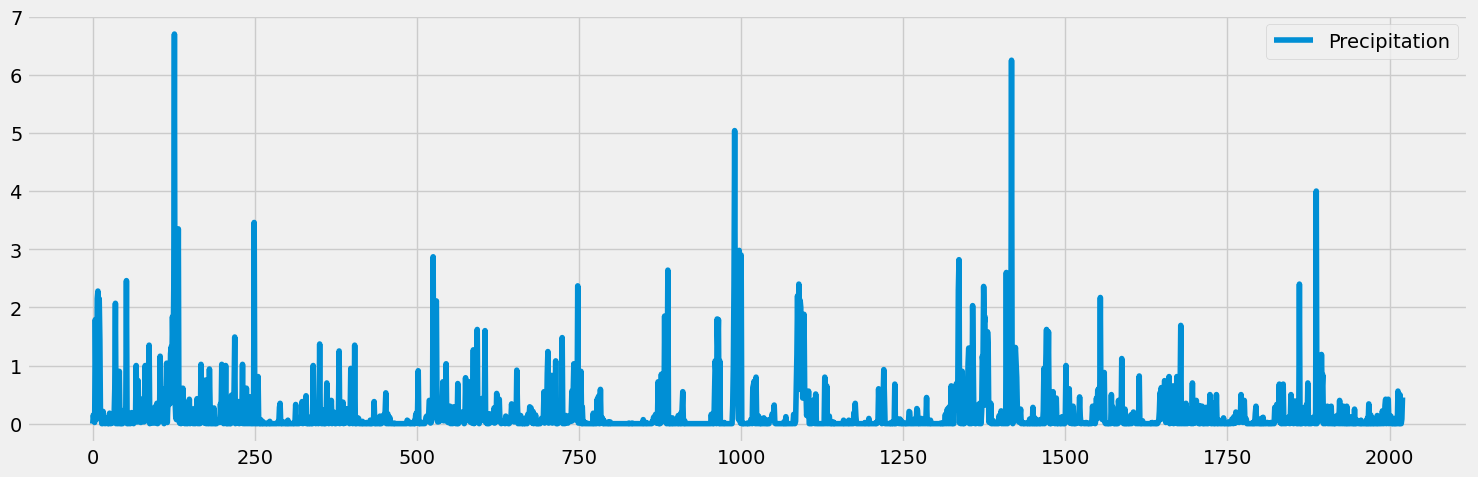

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(15,5))
plt.tight_layout()
plt.savefig('Precip.png')

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
sql_session.query(measurement.station).distinct().count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_id = [measurement.station, func.count(measurement.id)]
count = sql_session.query(*station_id).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sql_session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))
sql_session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

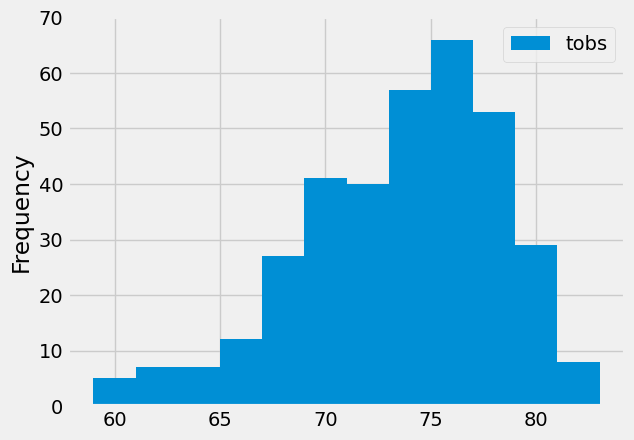

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = dt.date(2017,8,23)

results = sql_session.query(measurement.tobs).filter(measurement.date >= year_calc, measurement.station == 'USC00519281').order_by(measurement.tobs).all()

temp_df = pd.DataFrame(results, columns=['tobs'])
temp_df.head()
temp_df=temp_df.astype(float)
temp_df.plot.hist(bins=12)
plt.ylim(0,70)
plt.savefig('station-histogram.png')

# Close Session

In [19]:
# Close Session
sql_session.close()